In [15]:
import numpy as np
import pandas as pd
import urllib.request
import json
import requests

In [16]:
with urllib.request.urlopen("https://github.com/Egor1077/PatternRecognition_HW2/blob/main/train_01.json") as url:
    data = json.loads(url.read().decode())
print(data)

JSONDecodeError: Expecting value: line 7 column 1 (char 6)

In [22]:
#'C:\\Users\\Богдан Кирсенко\\Desktop\\train_01.json'
url = "https://api.github.com/Egor1077/PatternRecognition_HW2/blob/main/train_01.json"
# with open(url) as f:
#     templates = json.load(f)

# print(templates)
#f = urlopen(url)
resp = requests.get(url).json()
#print(f.read())
#templates = json.loads(resp.text)
print(resp)

{'message': 'Not Found', 'documentation_url': 'https://docs.github.com/rest'}


In [3]:
df1 = pd.read_json(url)
df1

ValueError: Expected object or value

In [213]:
dict_in = {}
dict_in['x1'] = [i[0] for i in templates['inside']]
dict_in['x2'] = [i[1] for i in templates['inside']]
dict_out = {}
dict_out['x1'] = [i[0] for i in templates['outside']]
dict_out['x2'] = [i[1] for i in templates['outside']]

In [214]:
in_df = pd.DataFrame(dict_in)
in_df['class'] = -1
out_df = pd.DataFrame(dict_out)
out_df['class'] = 1
df = pd.concat([in_df,out_df]).reset_index()
df.head()

,index,x1,x2,class
0,0,0.729520,0.728634,-1
1,1,0.826506,0.940316,-1
2,2,0.602314,0.489100,-1
3,3,0.792430,0.972460,-1
4,4,0.373906,0.380795,-1


In [215]:
X = np.array(df[['x1','x2']])
Y = np.array(df["class"])

x=[[1,0,0,0,0,0],[0,1,0,0,0,0]]
y=[1,1]

for i in range(X.shape[0]):
    x.append([X[i][0]**2,X[i][1]**2,X[i][0]*X[i][1],X[i][0],X[i][1],1])
    y.append(Y[i])
print(len(x))

31


In [216]:
from numpy import linalg
A = np.ones(6)
i=0
while True:
    Cig = np.array([[A[0],A[2]/2],[A[2]/2,A[1]]])/(A[1]*A[0]-(A[2]/2)**2)
    wb,vb = linalg.eigh(Cig)
    j=0
    for i in range(2):
        if wb[i]<0:
            x.append([vb[i][0]**2, vb[i][1]**2, vb[i][0]*vb[i][1], 0, 0, 0])
            y.append(1)
            j +=1
    while (i < len(x) and y[i]*A.dot(x[i]) > 0):
        i += 1
    if i == len(x): 
        break
    r = (np.linalg.norm(x[i])**2-A.dot(x[i]))/(np.linalg.norm(A)**2-2*y[i]*A.dot(x[i])+y[i]**2 * np.linalg.norm(x[i])**2)
    A = A*r + (1-r)*y[i]*np.array(x[i])
    for t in range(j):
        x.pop(len(x)-1)
    i = 0
print(A)

[ 0.03832503  0.05016964 -0.09057632  0.00815393 -0.01528797 -0.00337921]


In [217]:
z = np.random.rand(1000,2)
z

array([[0.04599482, 0.59835461],
       [0.41198421, 0.89476142],
       [0.62137022, 0.67830426],
       ...,
       [0.57187689, 0.58923066],
       [0.85132337, 0.2142522 ],
       [0.16943705, 0.40931793]])

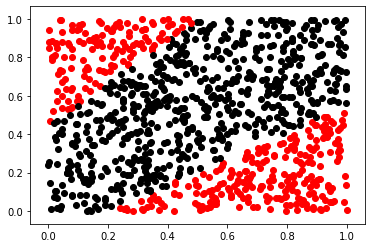

In [220]:
import matplotlib.pyplot as plt
Z = [[z[i][0]**2, z[i][1]**2,z[i][0]*z[i][1],z[i][0],z[i][1],1] for i in range(1000)]
j=0
for j in range(1000):
    if A.dot(Z[j]) > 0:
        plt.scatter(z[j][0],z[j][1], c = 'r')
    else:
        plt.scatter(z[j][0],z[j][1], c = 'black')

plt.show()